#### Lecture 1. Data Visualization - Graph tools

Matplotlib
- 다양한 graph 작성(r의 ggplot 기반), pasdas와 연동
- pyplot 객체를 사용하여 데이터 표시, 객체에 그래프를 쌓고 flush

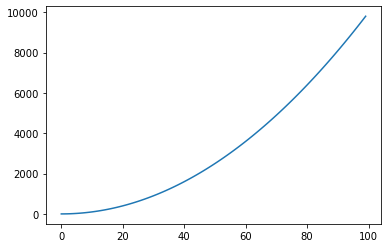

In [1]:
import matplotlib.pyplot as plt
X = range(100)
Y = [value ** 2 for value in X]
plt.plot(X, Y)
plt.show()

- 그래프는 figure 객체에 생성됨
- pyplot 사용 시, 기본 figure에 그래프가 그려짐

In [2]:
import numpy as np
X_1 = range(100) # 데이터가 정렬된 상태이어야 함
Y_1 = [np.cos(value) for value in X_1]
X_2 = range(100)
Y_2 = [np.sin(value) for value in X_2]

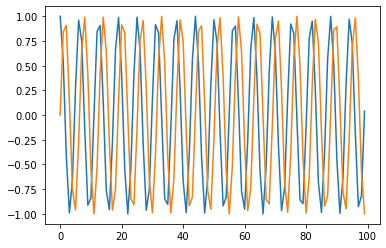

In [3]:
plt.plot(X_1, Y_1)
plt.plot(X_2, Y_2)
plt.show()

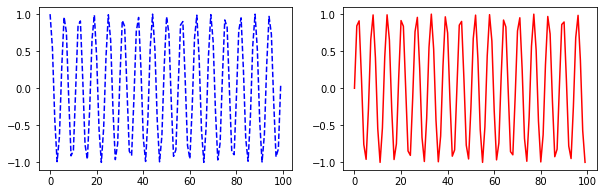

In [4]:
fig = plt.figure()
fig.set_size_inches(10,3)
ax_1 = fig.add_subplot(1,2,1) # grid 형태
ax_2 = fig.add_subplot(1,2,2)
ax_1.plot(X_1, Y_1, c="b", linestyle="dashed")
ax_2.plot(X_2, Y_2, c="r")

<ipython-input-5-0ac252871af4>:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "c" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("test.png", c="a") # flush 하기 전에 저장


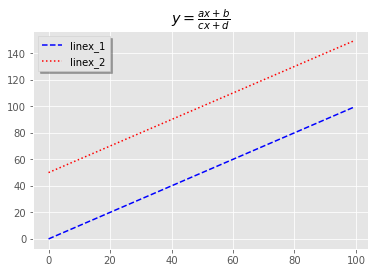

In [5]:
X_1 = range(100)
Y_1 = range(100)
X_2 = range(100)
Y_2 = [x+50 for x in X_2]

plt.style.use("ggplot")
# plt.style.use("classic")
plt.plot(X_1, Y_1, color="b", linestyle="dashed", label="linex_1")
plt.plot(X_2, Y_2, color="r", linestyle="dotted", label="linex_2")
plt.title("$y=\\frac{ax+b}{cx+d}$")
plt.legend(shadow=True, fancybox=False, loc="upper left")
plt.savefig("test.png", c="a") # flush 하기 전에 저장
plt.show()

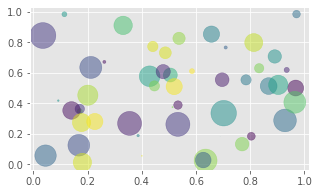

In [6]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
fig = plt.figure()
fig.set_size_inches(5,3)
area = np.pi * (15 * np.random.rand(N))**2
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

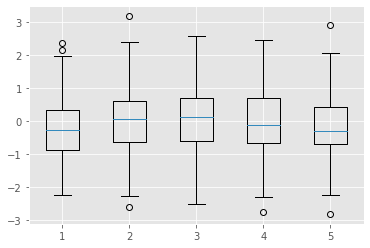

In [7]:
data = np.random.randn(100, 5)
plt.boxplot(data)
plt.show()

Seaborn : statical data visualization
- matplotlib에 기본 설정 추가
- 간단한 코드 + 이쁜 디자인
- tutorial 참고할 것

#### Lecture 2. Statistics

통계적 모델링 : 적절한 가정위에서 확률 분포를 추정하는 것
- 데이터의 개수가 유한하므로 모집단의 확률분포는 근사적으로 추정할 수밖에 없음
- 모수적(parametric) 방법론 : 데이터가 특정 확률분포를 따른다고 선험적으로 가정 후 모수(parameter)를 추정
    - 확률분포를 가정하는 방법 : 히스토그램을 통해 모양 관찰, 데이터 생성원리 우선고려
        - 데이터가 2개의 값(0 또는 1) >> 베르누이분포
        - 데이터가 n개의 이산적인 값 >> 카테고리분포
        - 데이터가 (0,1) 사이 값 >> 베타분포
        - 데이터가 0 이상의 값 >> 감마분포, 로그정규분포
        - 데이터가 실수 전체 >> 정규분포, 라플라스분포
- 비모수적(nonparametric) 방법론 : 데이터에 따라 모델의 구조 및 모수의 개수가 바뀜

정규분포 : 모수 평균 $\mu$ 분산 $\sigma ^2$ 
- 표본평균 $ \bar{X} = \frac{1}{N}\sum_{i=1}^{N}X_i$
- 표본분산 $ S^2 = \frac{1}{N-1}\sum_{i=1}^{N}(X_i-\bar{X})^2 $
- 표집분포(sampling distribution) : sample distribution(표본분포)와는 다름
    - 표본평균의 표집분포 N이 커질수록 정규분포 $\mathcal{N}(\mu,\sigma ^2 / N) $ 에 수렴
    - 중심극한정리(central limit theorem)
    - 표본의 분포는 N이 커져도 형태가 변하지 않지만 표본평균들의 분포는 정규분포화 됨

최대가능도 추정법(MLE : maximum likelihood estimation)
- 이론적으로 가장 가능성이 높은 모수를 추정하는 방법
$$ \hat{\theta} = \underset{\theta}{argmax}L(\theta;x) = \underset{\theta}{argmax}P(x|\theta) $$
- 확률이 모수가 주어져 있을 때 x에 대한 함수인데 반해, MLE는 주어진 데이터에 대해서 모수($\theta$)에 따라 변하는 함수임
- $\theta$에 대해 적분해도 1이 안되므로 확률로 해석하면 안됨(대소 비교만)
- 데이터 집합 X가 독립적으로 추출되었을 경우 로그가능도를 최적화
    - 로그는 증가함수 이므로 로그가능도 최적화 모수가 가능도도 최적화
    - 데이터의 숫자가 커지면 컴퓨터의 정확도로는 가능도 계산이 불가능
    - 데이터가 독립일 경우 로그를 사용하면 곱셈 연산을 덧셈으로 치환 가능
    - 미분 연산 시 로그 가능도 사용하면 연산량이 O(n^2) -> O(n)
    - 경사하강법 적용 시 음의 로그가능도 이용
- 정규분포에 MLE 적용
    - $\hat{\mu}_{MLE} = \frac{1}{n}\sum_{i=1}^{n}x_i$  # 표본의 산술 평균과 동일
    - $\hat{\sigma}_{MLE}^{2} = \frac{1}{n}\sum_{i=1}^{n}(x_i-\mu)^2$  # 불편추정량을 보장하지 않음
- 카테고리 분포에 MLE 적용하여 모수 추정
    - Multinoulli(x;p1,...,pd)를 따르는 확률변수 X로부터 독립적인 표본 {x1,...,xn}을 얻었을 때
    - 로그가능도, 라그랑주 승수법(제약 조건: p1+p2+...+pd = 1) 사용
    - $p_k = \frac{n_k}{\sum_{k=1}^{d}n_k} $ 즉, 추정확률 = 사건 개수 / 전체 사건 수
- 딥러닝에서 최대가능도 추정법
    - 딥러닝 모델의 가중치를 $\theta = (W^{(1)},.., W^{L})$ 라 할때, 분류문제에서 소프트 맥스 벡터가 카테고리 분포의 모수 $(p_1, ..., p_k)$를 모델링
    $$\hat{\theta}_{MLE} = \underset{\theta}{argmax}\frac{1}{n}\sum_{i=1}^n\sum_{k=1}^{K}y_{i,k}log(MLP_{\theta}(x_i)_k)$$

MLE 예시

동전을 100번 던져서 앞면이 60번 나왔다. 앞면이 나올 확률이 p(모수)라고 하면 가장 이러한 사건이 일어날 가능도가 높은 p를 구해보면..
일단 100번 던져서 60번 앞면이 나오는 확률 P = 100C60 p^60 (1-p)^40
이러한 확률을 p로 미분했을 때 0이 되는 p값이 P가 최대가 될 떄일 것이며 이것이 MLE로 추정되는 모수 p이다.

로그함수의 성질을 생각했을때 P의 증감은 f(p) =log(p^60 (1-p)^40)과 증감이 같다. 즉 f(p) 가 최대가 될때 P도 최대가 된다.
df/dp = 60/p - 40/(1-p) = 0 , 즉 p = 0.6 일때 f'(p) = 0 이 되며 이것이 우리의 직관과 일치한다. 


In [8]:
# code 로 확인
import math

p = 60
not_p = 40

for i in range(1,100):
    ans = math.factorial(p+not_p) / (math.factorial(p)*math.factorial(not_p)) * pow(i/100,p) * pow((100-i)/100,not_p)
    if ans < 0.01:
        continue
    print(f'이론이 {i/100} 라고 가정할 때 likelihood 계산')
    print(round(ans,4))

이론이 0.5 라고 가정할 때 likelihood 계산
0.0108
이론이 0.51 라고 가정할 때 likelihood 계산
0.0159
이론이 0.52 라고 가정할 때 likelihood 계산
0.0223
이론이 0.53 라고 가정할 때 likelihood 계산
0.0301
이론이 0.54 라고 가정할 때 likelihood 계산
0.0391
이론이 0.55 라고 가정할 때 likelihood 계산
0.0488
이론이 0.56 라고 가정할 때 likelihood 계산
0.0586
이론이 0.57 라고 가정할 때 likelihood 계산
0.0675
이론이 0.58 라고 가정할 때 likelihood 계산
0.0748
이론이 0.59 라고 가정할 때 likelihood 계산
0.0796
이론이 0.6 라고 가정할 때 likelihood 계산
0.0812
이론이 0.61 라고 가정할 때 likelihood 계산
0.0795
이론이 0.62 라고 가정할 때 likelihood 계산
0.0746
이론이 0.63 라고 가정할 때 likelihood 계산
0.0671
이론이 0.64 라고 가정할 때 likelihood 계산
0.0577
이론이 0.65 라고 가정할 때 likelihood 계산
0.0474
이론이 0.66 라고 가정할 때 likelihood 계산
0.0372
이론이 0.67 라고 가정할 때 likelihood 계산
0.0277
이론이 0.68 라고 가정할 때 likelihood 계산
0.0197
이론이 0.69 라고 가정할 때 likelihood 계산
0.0133


확률분포간 거리
- 기계학습의 손실함수는 모델이 학습하는 확률분포와 데이터 상의 확률분포의 거리에서 유도
- 쿨백-라이블러 발산(KL Divergence)
    - 크로스 엔트로피와 엔트로피의 합으로 구성
    - 최대가능도 추정법의 손실함수가 -cross-entropy 와 동일
    - KL Divergence 최소화가 최대가능도 추정법과 동일

#### Further question

확률과 가능도의 차이
- 확률 : 주어진 모델 파라미터나 관찰된 데이터에 대한 참조없이, 랜덤 출력이 일어날 가능성으로 (특정 사건 경우의 수)/(전체 사건 경우의 수)
- 가능도 : 관찰된 데이터를 기반으로 한 모델 파라미터가 될 수 있는 가능성
- 확률은 사건의 가능성, 가능도는 모수(parameter)의 가능성

확률 대신 가능도를 사용하였을 때의 이점
- 이산확률 분포의 경우 : 가능도 = 확률
- 연속 사건의 경우 확률밀도함수(PDF:Probability Density Function) 사용
- 확률은 PDF의 넓이에 해당하며 연속사건간의 가능성 차이를 표시 불가
    - 특정사건의 확률은 모두 0 이기 때문
- 가능도는 PDF의 y값을 의미하며 가능성 차이를 표시할 수 있다

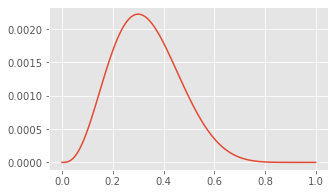

In [9]:
# 확률 예제 코드
import numpy as np
import matplotlib.pyplot as plt
theta = np.arange(0, 1, 0.001)
p = theta ** 3 * (1 - theta) ** 7
fig = plt.figure()
fig.set_size_inches(5,3)
plt.plot(theta, p)
plt.show()

 - 이항분포의 확률밀도함수의 그래프와 유사
 - 10번 시행했는데 3번 발생한 사건의 확률을 ${\theta}$라 두면
 - ${\theta}$의 값에 따른 likelihood 값이 p로 정해짐
 - 위식을 미분한 $\frac{dp}{d\theta}$ = 0 이 되는 theta = 0.3
 - ${\theta}$가 의미할 수 있는 것은 결과값이 2개로 나뉘는 사건 중 하나가 발생할 확률
 - 동전 던지기에서 앞면이 나오는 확률, 야구 경기에서 이기는 확률

